# **EDF with LSTM-based RNNs in Romania**

This implementation proposes the use of a LSTM-based RNN for the purpose of Electricity Demand Forecasting (EDF) in Romania.

# Data pre-processing 

In [ ]:
#import the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout
%matplotlib inline

In [ ]:
#import the dataset from GitHub
url = "https://raw.githubusercontent.com/vladsurdea/ML/main/Data/RomaniaEDF.csv"
df= pd.read_csv(url)

#get rid of missing values

#inspect the dataset
df=df.dropna()
df.sample(10)

,Year,Month,Day,Hour,Value
58692,2012,9,11,12,6367.0
119488,2019,8,19,14,6772.0
1616,2006,3,9,8,6931.0
4640,2006,7,13,8,5700.0
54426,2012,3,17,18,7010.0
85422,2015,9,30,6,6049.0
14861,2007,9,12,5,5564.0
27562,2009,2,22,10,5629.0
15737,2007,10,18,17,6445.0
28945,2009,4,21,1,4019.0


In [ ]:
# create datetime variable
df["Datetime"]=pd.to_datetime(df[["Year", "Month", "Day", "Hour"]])
del df["Year"]
del df["Month"]
del df["Day"]
del df["Hour"]

#inspect the new dataset
df.sample(20)

,Value,Datetime
24073,5352.0,2008-09-30 01:00:00
40565,5115.0,2010-08-18 05:00:00
91737,4967.0,2016-06-19 07:00:00
103201,7594.0,2017-10-09 21:00:00
110202,6168.0,2018-07-28 16:00:00
42317,5718.0,2010-10-30 05:00:00
35969,7091.0,2010-02-07 17:00:00
55299,4781.0,2012-04-23 03:00:00
108643,6690.0,2018-05-24 17:00:00
32831,5014.0,2009-09-29 23:00:00


In [ ]:
# Other data wrangling steps
dataset=df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()

#Set datetime variable as index
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


,Value,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2016-12-06 16:00:00,8242.0,12,2016,2016-12-06,16:00:00,49,Tuesday
2008-10-10 00:00:00,5555.0,10,2008,2008-10-10,00:00:00,41,Friday
2016-04-02 06:00:00,4886.0,4,2016,2016-04-02,06:00:00,13,Saturday
2010-11-21 23:00:00,4982.0,11,2010,2010-11-21,23:00:00,46,Sunday
2012-09-27 06:00:00,5927.0,9,2012,2012-09-27,06:00:00,39,Thursday
2017-10-01 09:00:00,5098.0,10,2017,2017-10-01,09:00:00,39,Sunday
2015-01-07 04:00:00,5961.0,1,2015,2015-01-07,04:00:00,2,Wednesday
2013-08-29 00:00:00,4680.0,8,2013,2013-08-29,00:00:00,35,Thursday
2008-03-20 19:00:00,7778.0,3,2008,2008-03-20,19:00:00,12,Thursday


# Split dataset into testing and training data

In [ ]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [ ]:
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)




In [ ]:

X_Train = []
Y_Train = []

for i in range(60, Train.shape[0]):
    X_Train.append(Train[i-60:i])
    Y_Train.append(Train[i])

X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)


(4871, 60, 1)
(4871, 1)


In [ ]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4871, 60, 1)

# Building the LSTM-based RNN

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the LSTM-based RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Compiling the LSTM-based RNN
regressor.fit(X_Train, Y_Train, epochs = 100, batch_size = 32)

Epoch 1/100
153/153 [==============================] - 16s 61ms/step - loss: 0.0496
Epoch 2/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0181
Epoch 3/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0160
Epoch 4/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0166
Epoch 5/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0160
Epoch 6/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0152
Epoch 7/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0141
Epoch 8/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0148
Epoch 9/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0145
Epoch 10/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0138
Epoch 11/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0146
Epoch 12/100
153/153 [==============================] - 9s 61ms/step - loss: 0.0136


# Create predictions dataset

In [ ]:
Df_Total = pd.concat((NewDataSet[["Value"]], TestData[["Value"]]), axis=0)

(5091, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

(160, 1)

In [ ]:

inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted = sc.inverse_transform(predicted)

In [ ]:
True_MegaWatt = TestData["Value"].to_list()
Predicted_MegaWatt  = predicted
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

In [ ]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2019-05-24,6048.250000,5405.406250
1,2019-05-25,5517.458333,6724.579102
2,2019-05-26,4940.000000,5902.499512
3,2019-05-27,5898.875000,5406.529785
4,2019-05-28,6090.250000,6126.392578
...,...,...,...
95,2019-08-27,6676.833333,6671.380371
96,2019-08-28,6674.333333,6699.192871
97,2019-08-29,6529.041667,6709.097168
98,2019-08-30,6588.750000,6471.020996


# Visualise results

No handles with labels found to put in legend.


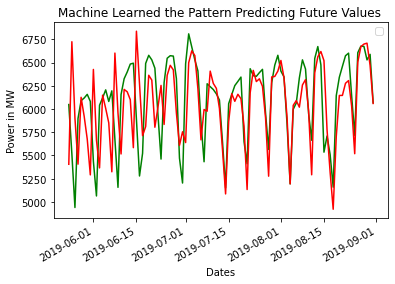

In [ ]:
plt.style.use('seaborn-pastel')
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()